**<font size="4">Выполнил студент группы М3О-210Б-21 - Караваев Кирилл Романович.</font>**

<font size="4">Построить гистограмму и эмпирическую функцию распределения оценок мат. ожидания распределения Рэлея ($\sigma=2$) для объёма выборок $25, 100, 500, 1000$. (Для этого повторить $800$ раз вычисления мат. ожидания для каждой выборки).</font>

---
Подключаем необходимые библиотеки.

In [1]:
import numpy as np
from scipy.stats import rayleigh, norm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

---
Устанавливаем параметры распределения. 

In [2]:
# Задаем параметры
sigma = 2
sample_sizes = [25, 100, 500, 1000]
num_samples = 800
num_intervals = 15

---
Генерируем выборки. Вычисляем оценки мат. ожидания.

In [3]:
# Генерируем выборки и вычисляем оценки математического ожидания
estimates = {}
samples = {}

for size in sample_sizes:
    estimates[size] = []
    samples[size] = []
    for _ in range(num_samples):
        sample = rayleigh.rvs(scale=sigma, size=size)
        estimate = np.mean(sample)
        estimates[size].append(estimate)
        samples[size].append(sample)

---
Формируем статистический ряд.

In [4]:
for i, size in enumerate(sample_sizes):
    # Статистический ряд
    hist, bins = np.histogram(estimates[size], bins=num_intervals, density=False)
    frequencies = hist / np.sum(hist)
    cumulative_freq = np.cumsum(frequencies)
    cumulative_freq[-1] = 1

    # Сохраняем статистический ряд и функцию распределения в CSV файл
    data = {
        'Левая граница': bins[:-1],
        'Правая граница': bins[1:],
        'Кол-во попаданий': hist,
        'Частота': frequencies,
        'Функция распределения': cumulative_freq
    }

    df_stats = pd.DataFrame(data)
    df_stats.to_csv(f'stats_{size}.csv', index=False, header=f'Статистический ряд (Выборка: {size})')

---
Формируем датафреймы.

In [5]:
df1 = pd.read_csv('stats_25.csv')
df2 = pd.read_csv('stats_100.csv')
df3 = pd.read_csv('stats_500.csv')
df4 = pd.read_csv('stats_1000.csv')

---
**<font size="3">Cтатистистический ряд. Выборка: 25</font>**

In [6]:
df1

,Левая граница,Правая граница,Кол-во попаданий,Частота,Функция распределения
0,1.719554,1.838064,5,0.00625,0.00625
1,1.838064,1.956574,11,0.01375,0.02000
2,1.956574,2.075084,30,0.03750,0.05750
3,2.075084,2.193594,56,0.07000,0.12750
4,2.193594,2.312104,101,0.12625,0.25375
5,2.312104,2.430614,141,0.17625,0.43000
6,2.430614,2.549124,150,0.18750,0.61750
7,2.549124,2.667634,118,0.14750,0.76500
8,2.667634,2.786144,77,0.09625,0.86125
9,2.786144,2.904654,62,0.07750,0.93875


---
**<font size="3">Cтатистистический ряд. Выборка: 100</font>**

In [7]:
df2

,Левая граница,Правая граница,Кол-во попаданий,Частота,Функция распределения
0,2.079349,2.133899,3,0.00375,0.00375
1,2.133899,2.188449,9,0.01125,0.01500
2,2.188449,2.242999,10,0.01250,0.02750
3,2.242999,2.297549,19,0.02375,0.05125
4,2.297549,2.352098,56,0.07000,0.12125
5,2.352098,2.406648,93,0.11625,0.23750
6,2.406648,2.461198,112,0.14000,0.37750
7,2.461198,2.515748,118,0.14750,0.52500
8,2.515748,2.570298,129,0.16125,0.68625
9,2.570298,2.624847,108,0.13500,0.82125


---
**<font size="3">Cтатистистический ряд. Выборка: 500</font>**

In [8]:
df3

,Левая граница,Правая граница,Кол-во попаданий,Частота,Функция распределения
0,2.297579,2.324461,1,0.00125,0.00125
1,2.324461,2.351343,1,0.00125,0.00250
2,2.351343,2.378225,12,0.01500,0.01750
3,2.378225,2.405106,20,0.02500,0.04250
4,2.405106,2.431988,43,0.05375,0.09625
5,2.431988,2.458870,79,0.09875,0.19500
6,2.458870,2.485752,127,0.15875,0.35375
7,2.485752,2.512634,150,0.18750,0.54125
8,2.512634,2.539516,133,0.16625,0.70750
9,2.539516,2.566398,106,0.13250,0.84000


---
**<font size="3">Cтатистистический ряд. Выборка: 1000</font>**

In [9]:
df4

,Левая граница,Правая граница,Кол-во попаданий,Частота,Функция распределения
0,2.379828,2.397803,2,0.00250,0.00250
1,2.397803,2.415778,9,0.01125,0.01375
2,2.415778,2.433753,23,0.02875,0.04250
3,2.433753,2.451729,41,0.05125,0.09375
4,2.451729,2.469704,69,0.08625,0.18000
5,2.469704,2.487679,95,0.11875,0.29875
6,2.487679,2.505654,151,0.18875,0.48750
7,2.505654,2.523629,145,0.18125,0.66875
8,2.523629,2.541605,113,0.14125,0.81000
9,2.541605,2.559580,78,0.09750,0.90750


Центральная предельная теорема (ЦПТ) утверждает, что сумма большого числа независимых случайных величин, имеющих конечное математическое ожидание и дисперсию, приближается к нормальному распределению.

Мы вычисляем оценки математического ожидания многократно для выборки, предполагается, что каждое измерение выборки является независимой случайной величиной с одинаковым распределением. При этом каждое измерение выборки можно рассматривать как случайную величину, имеющую свое математическое ожидание и дисперсию.

ЦПТ утверждает, что сумма этих случайных величин (в данном случае, оценок математического ожидания) приближается к нормальному распределению с ростом размера выборки. Более конкретно, когда размер выборки становится достаточно большим, распределение суммы оценок математического ожидания становится все более близким к нормальному распределению.

Пусть $\{ \xi_n\}, \, n\in\mathbb{N}$ - последовательность независимых и одинаково распределённых случайных величин, с конечными вторыми моментами. Пусть $m_k = \mathbb{E}\xi_k < \infty$ и $0 < \sigma_k^2 = \mathbb{D}\xi_k < +\infty, \, S_n = \xi_1 + \dots + \xi_n, \, \mathbb{D}_n^2 = \sum\limits_{k=1}^{n}\sigma_k^2$ и $F_k = F_k(x)$ - функция распределения случайной величины $\xi_k$, в нашем случае $\xi_k \sim Rayleigh(\sigma)$. Тогда 
$$
\cfrac{S_n - \mathbb{E}S_n}{\sqrt{\mathbb{D}S_n}} \xrightarrow{d} \mathcal{N}(0, 1)
$$

Таким образом, построим графики гистограммы и функции распределения, используя нормальное распределение:

$$
\xi \sim \mathcal{N}\left(\mu, \sigma^2\right), \quad \mu \in \mathbb{R}, \, \sigma > 0
$$

*Плотность вероятности:*
$$
f_\xi(x) = \cfrac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}, \quad x \in \mathbb{R}
$$

*Функция распределения:*
$$
F_{\xi}(x) = \Phi\left(\cfrac{x-\mu}{\sigma}\right),
$$
где $\Phi(x) = \cfrac{1}{\sqrt{2\pi}}\int\limits_{0}^{x}e^{-\frac{x^2}{2}}dx$ - функция Лапласа


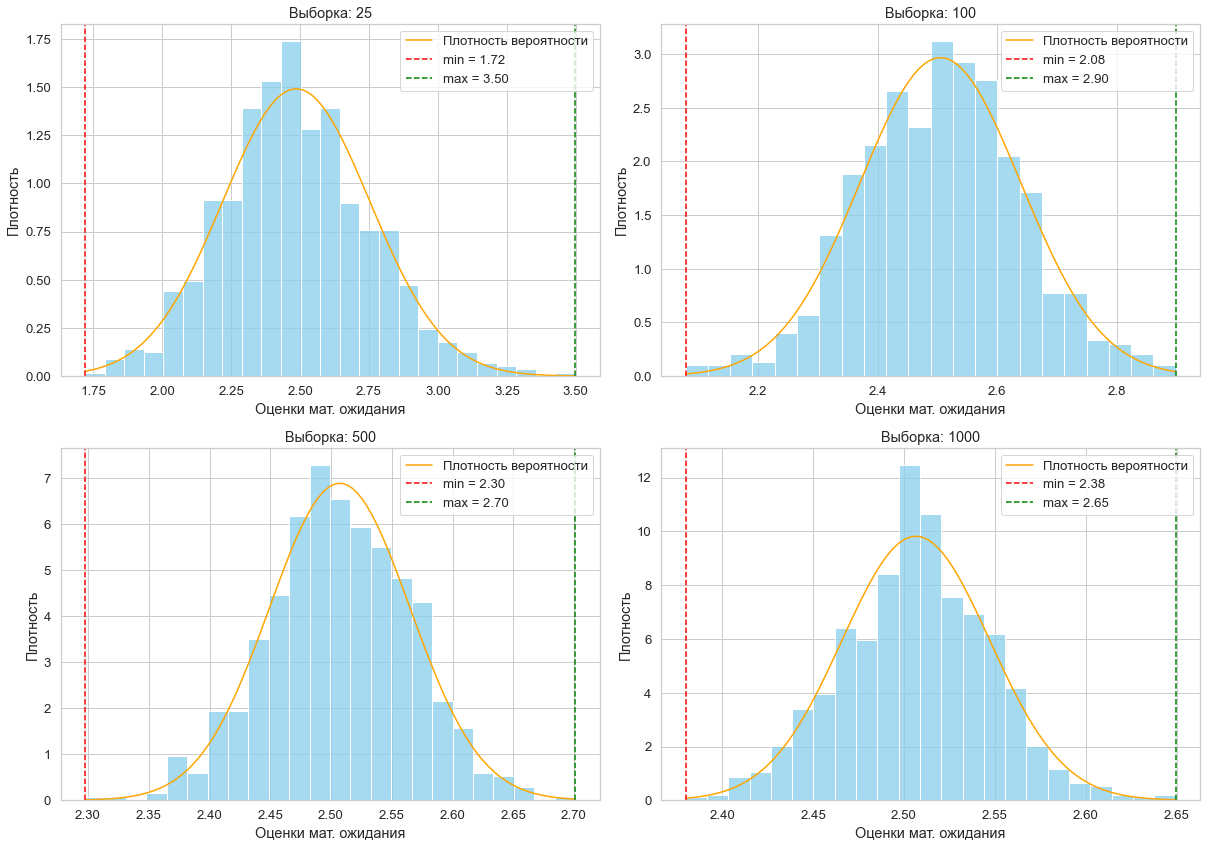

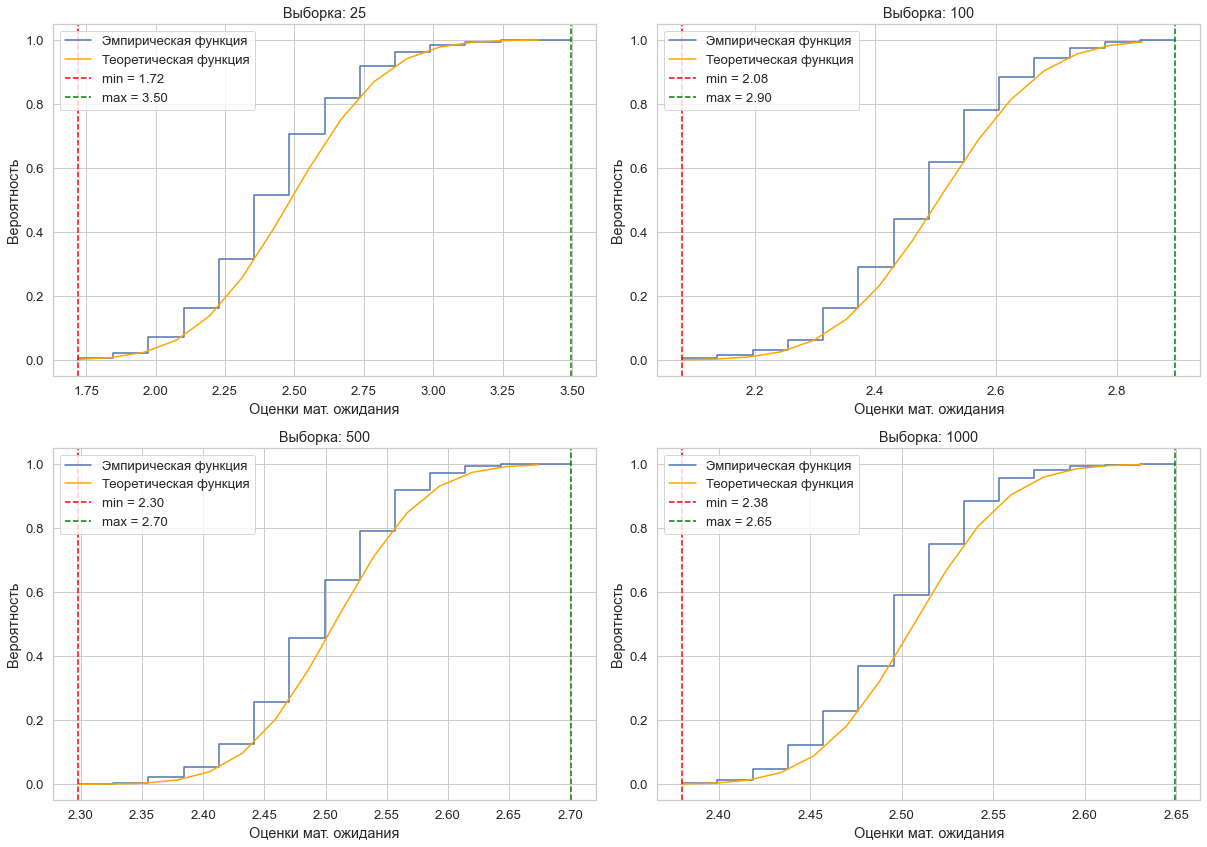

In [10]:
# Гистограммы оценок математического ожидания с плотностями вероятности
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(2, 2, figsize=(17, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
axes = axes.flatten()

for i, size in enumerate(sample_sizes):
    sorted_estimates = np.sort(estimates[size])
    ax = axes[i]
    sns.histplot(estimates[size], kde=False, stat="density", color='skyblue', ax=ax)
    ax.set_title(f"Выборка: {size}")
    ax.set_xlabel("Оценки мат. ожидания")
    ax.set_ylabel("Плотность")

    # Плотность вероятности для нормального распределения
    x = np.linspace(min(estimates[size]), max(estimates[size]), 100)
    mu_hat = np.mean(estimates[size])
    sigma_hat = np.std(estimates[size])
    y = norm.pdf(x, loc=mu_hat, scale=sigma_hat)
    ax.plot(x, y, label="Плотность вероятности", color='orange')
    ax.legend()

    # Отображение минимального и максимального значения оценок
    min_estimate = np.min(estimates[size])
    max_estimate = np.max(estimates[size])
    ax.axvline(x=min_estimate, color='red', linestyle='--', label=f'min = {min(sorted_estimates):.2f}')
    ax.axvline(x=max_estimate, color='green', linestyle='--', label=f'max = {max(sorted_estimates):.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Эмпирические и теоретические функции распределения
fig, axes = plt.subplots(2, 2, figsize=(17, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
axes = axes.flatten()

for i, size in enumerate(sample_sizes):
    ax = axes[i]
    sorted_estimates = np.sort(estimates[size])
    ecdf = np.arange(1, len(sorted_estimates) + 1) / len(sorted_estimates)

    # Ступенчатая функция распределения
    lower_bound = min(sorted_estimates)
    upper_bound = max(sorted_estimates)
    x = np.linspace(lower_bound, upper_bound, num=num_intervals)
    y = np.interp(x, sorted_estimates, ecdf)
    ax.step(np.insert(x, 0, lower_bound), np.insert(y, 0, 0), label='Эмпирическая функция', where='pre')

    #Теоретическая функция распределения (нормальное распределение)
    x_theoretical = np.linspace(lower_bound, upper_bound, num=num_intervals, endpoint=False)
    mu_hat = np.mean(estimates[size])
    sigma_hat = np.std(estimates[size])
    y_theoretical = norm.cdf(x_theoretical, loc=mu_hat, scale=sigma_hat)
    ax.plot(x_theoretical, y_theoretical, label='Теоретическая функция', color='orange')

    ax.set_title(f"Выборка: {size}")
    ax.set_xlabel("Оценки мат. ожидания")
    ax.set_ylabel("Вероятность")
    ax.legend()
    
    # Отображение минимального и максимального значения оценок
    min_estimate = np.min(estimates[size])
    max_estimate = np.max(estimates[size])
    ax.axvline(x=min_estimate, color='red', linestyle='--', label=f'min = {min(sorted_estimates):.2f}')
    ax.axvline(x=max_estimate, color='green', linestyle='--', label=f'max = {max(sorted_estimates):.2f}')
    ax.legend()
    
    # Отображение настоящих значений на оси X
    #ax.set_xticks(np.concatenate((min_values, max_values)))
    #ax.set_xticklabels([f'{val:.2f}' for val in np.concatenate((min_values, max_values))], ha='center')

plt.tight_layout()
plt.show()

---
Вывод результатов.

In [11]:
# Таблица с минимальным и максимальным математическим ожиданием
data = {
    'Объем выборки': sample_sizes,
    'Min μ': [np.min(estimates[size]) for size in sample_sizes],
    'Max μ': [np.max(estimates[size]) for size in sample_sizes],
    'Разность': [np.max(estimates[size]) - np.min(estimates[size]) for size in sample_sizes],
    'Расхождение %': [(np.max(estimates[size]) - np.min(estimates[size])) / np.mean(estimates[size]) * 100 for size in sample_sizes]
}

df_summary = pd.DataFrame(data)
df_summary.to_csv('summary.csv', index=False)
data = pd.read_csv('summary.csv')

In [12]:
data

,Объем выборки,Min μ,Max μ,Разность,Расхождение %
0,25,1.719554,3.497205,1.777651,71.514253
1,100,2.079349,2.897596,0.818247,32.666510
2,500,2.297579,2.700807,0.403228,16.083214
3,1000,2.379828,2.649456,0.269628,10.756994


---
Визуализация сходимости $\min$ и $\max$ оценок мат. ожидания при увеличении  объема выборки.

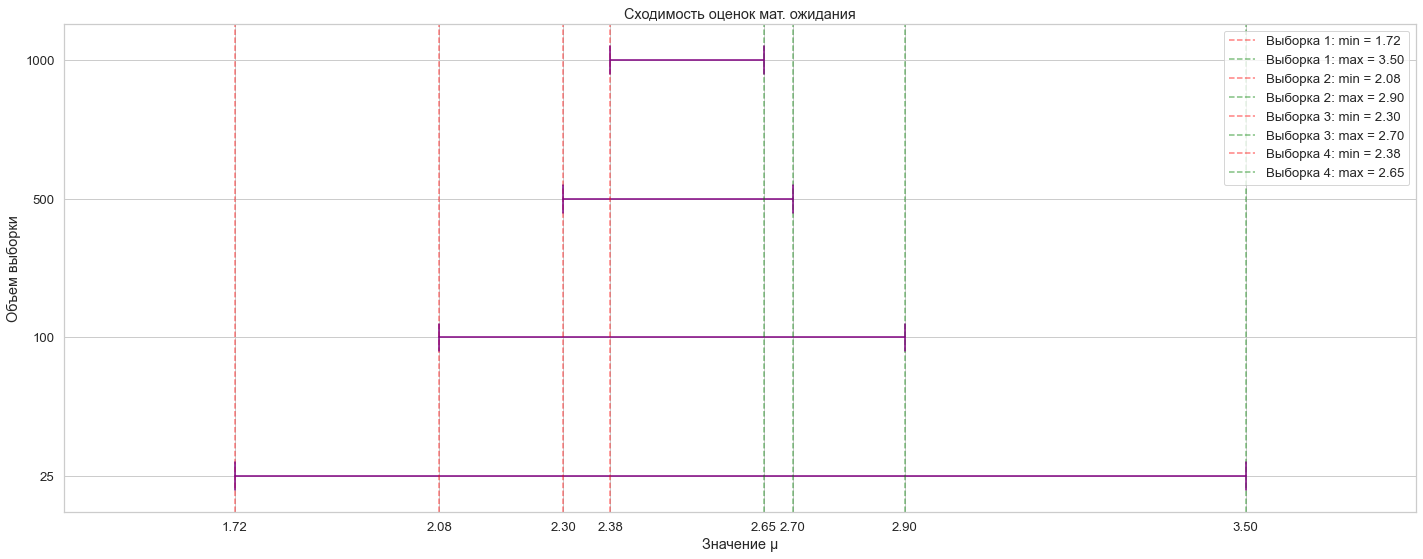

In [14]:
# Получение значений из столбцов таблицы
values = sample_sizes
min_values = [np.min(estimates[size]) for size in sample_sizes]
max_values = [np.max(estimates[size]) for size in sample_sizes]

sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(20, 8)) 

# Создание осей графика
ax = fig.add_subplot(111)

# Установка одинакового масштаба для оси Y
ax.set_xlim([min(min_values) - 0.3, max(max_values) + 0.3])

min_est = [np.min(estimates[size]) for size in sample_sizes]
max_est = [np.max(estimates[size]) for size in sample_sizes]
sorted_estimates = [np.sort(estimates[size]) for size in sample_sizes]

# Построение горизонтальных графиков в виде 4 отрезков
for i in range(len(values)):
    ax.axvline(x=min_est[i], color='red', linestyle='--', label=f'Выборка {i+1}: min = {min(sorted_estimates[i]):.2f}', alpha=0.5)
    ax.axvline(x=max_est[i], color='green', linestyle='--', label=f'Выборка {i+1}: max = {max(sorted_estimates[i]):.2f}', alpha=0.5)
    ax.plot([min_values[i], max_values[i]], [i+1, i+1], color='purple')
    ax.plot([min_values[i], min_values[i]], [i+0.9, i+1.1], color='purple')
    ax.plot([max_values[i], max_values[i]], [i+0.9, i+1.1], color='purple')
    ax.legend()

# Настройка осей и заголовка графика
ax.set_yticks(range(1, len(values)+1))
ax.set_yticklabels(values)
ax.set_xlabel('Значение μ')
ax.set_ylabel('Объем выборки')
ax.set_title('Сходимость оценок мат. ожидания')

# Отображение настоящих значений на оси X
ax.set_xticks(np.concatenate((min_values, max_values)))
ax.set_xticklabels([f'{val:.2f}' for val in np.concatenate((min_values, max_values))], ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

---
**<font size="4">Вывод:</font>**

С увеличением объема выборки точность и стабильность оценки математического ожидания улучшаются. Это соответствует ожиданиям, так как ЦПТ предсказывает, что сумма оценок математического ожидания будет приближаться к нормальному распределению с увеличением размера выборки.
Также границы минимального ($\min \mu$) и максимального ($\max \mu$) значений оценки математического ожидания сближаются с увеличением объема выборки. Это означает, что разность между наименьшим и наибольшим значением оценки математического ожидания уменьшается по мере увеличения размера выборки. Такое сближение границ указывает на то, что оценки математического ожидания становятся более стабильными и сходятся к определенному значению по мере увеличения размера выборки.